## HOTEL_1 Exploratory Data Analysis

### Import the libraries

In [2]:
import pandas as pd
import plotly.express as px
import numpy as np
import datetime

## EUR-HUF CONVERSION

- EUR HUF rate table for the period of 17.09.2024 - 18.10.2024. 
- I am working with official daily rate and for the weekend we use the Friday's data as the last known data.
- I used the Friday's closing rate on the weekends.

In [4]:
eur_huf = pd.read_csv('./../Morgens_notebooks/EUR_HUF_RATE_32_days.csv')
eur_huf['Date_EUR_HUF'] = pd.to_datetime(eur_huf['Date_EUR_HUF']) #datatype: change to date
eur_huf['Rate_EUR'] = eur_huf['Rate_EUR'].str.replace(',', '.')
eur_huf['Rate_EUR'] = pd.to_numeric(eur_huf['Rate_EUR']) #datatype: change to float


In [6]:
eur_huf.head()

Rate_EUR Date_EUR_HUF
0    394.27   2024-09-17
1    394.47   2024-09-18
2    394.70   2024-09-19
3    394.39   2024-09-20
4    394.39   2024-09-21

In [8]:
eur_huf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rate_EUR      32 non-null     float64       
 1   Date_EUR_HUF  32 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 644.0 bytes


### SEARCH table - EUR/HUF conversion

In [10]:
#Weboldalon indított kereséseket tárolja a search tábla
search = pd.read_csv('./../Morgens_notebooks/HOTEL_1/Original_data/search_log_hotel_1.csv', sep=';')

#datatype change to date:
search['utc_datetime'] = pd.to_datetime(search['utc_datetime'])
search['arrival'] = pd.to_datetime(search['arrival'])
search['departure'] = pd.to_datetime(search['departure'])

#utc_datetime change to only year-month-day into a new column
search['utc_date'] = search['utc_datetime'].dt.strftime('%Y-%m-%d')
search['utc_date'] = pd.to_datetime(search['utc_date'])

#conversion column: replace NaN with -1
search['conversion'].fillna(-1, inplace = True)

#final_price column: replace NaN with 0
search['total_price_final'].fillna(0, inplace = True)

In [11]:
#Drop the first 7 rows, where the utc_datetime is in 09-17, which is out of the examined timeperiod
search = search.iloc[7:]

In [12]:
search.head(8)

id  search_log_session_id        utc_datetime lang_code currency  \
7   112759                   4146 2024-09-18 01:27:28        hu      HUF   
8   112760                   4147 2024-09-18 01:53:05        hu      HUF   
9   112761                   4147 2024-09-18 01:59:34        hu      HUF   
10  112762                   4148 2024-09-18 02:10:58        hu      HUF   
11  112764                   4150 2024-09-18 03:46:37        de      EUR   
12  112765                   4150 2024-09-18 03:47:07        de      EUR   
13  112766                   4151 2024-09-18 03:49:10        hu      HUF   
14  112767                   4151 2024-09-18 03:49:36        hu      HUF   

      arrival  departure  days  nights  adults  children  conversion  \
7  2024-10-08 2024-10-12     5       4       2         0        -1.0   
8  2024-09-18 2024-09-19     2       1       2         0        -1.0   
9  2024-10-05 2024-10-06     2       1       2         0        -1.0   
10 2024-10-18 2024-10-20     3       2       2         0        -1.0   
11 2024-10-13 2024-10-17     5       4       2         0        -1.0   
12 2024-10-13 2024-10-17     5       4       2         0        -1.0   
13 2024-12-30 2024-12-31     2       1       2         3        -1.0   
14 2024-12-30 2024-12-31     2       1       2         3        -1.0   

    total_price_final   utc_date  
7                 0.0 2024-09-18  
8                 0.0 2024-09-18  
9                 0.0 2024-09-18  
10                0.0 2024-09-18  
11                0.0 2024-09-18  
12                0.0 2024-09-18  
13                0.0 2024-09-18  
14                0.0 2024-09-18

In [13]:
#Merge the search table with the conversion table
search_EUR = pd.merge(search, eur_huf, left_on='utc_date', right_on='Date_EUR_HUF')

In [14]:
#Calculate a new price column in HUF:
search_EUR['total_price_HUF'] = 0
for i in range(len(search_EUR)):
    if search_EUR.iloc[i,4] == 'HUF':
        search_EUR.iloc[i,16] = search_EUR.iloc[i, 12]
    elif search_EUR.iloc[i,4] == 'EUR':
        search_EUR.iloc[i, 16] = search_EUR.iloc[i, 12] * search_EUR.iloc[i, 14]

In [15]:
#Save the search_EUR table:
search_EUR.to_csv('./../Morgens_notebooks/HOTEL_1/Original_data/search_EUR.csv')

In [16]:
#Show the table where there is a total final price
search_EUR[search_EUR['total_price_final'] != 0]

id  search_log_session_id        utc_datetime lang_code currency  \
95     112857                   4205 2024-09-18 06:22:14        hu      HUF   
143    112906                   4234 2024-09-18 07:47:16        hu      HUF   
281    113050                   4302 2024-09-18 10:51:57        en      EUR   
288    113057                   4315 2024-09-18 11:00:34        hu      HUF   
300    113070                   4321 2024-09-18 11:15:56        hu      HUF   
...       ...                    ...                 ...       ...      ...   
20862  146055                  28191 2024-10-18 17:49:21        hu      HUF   
20872  146067                  28197 2024-10-18 18:11:16        hu      HUF   
20890  146085                  28200 2024-10-18 18:34:16        hu      EUR   
20899  146095                  28217 2024-10-18 18:53:37        hu      HUF   
20912  146108                  28226 2024-10-18 19:15:53        hu      HUF   

         arrival  departure  days  nights  adults  children  conversion  \
95    2025-02-13 2025-02-15     3       2       2         0         1.0   
143   2024-11-07 2024-11-10     4       3       2         2         1.0   
281   2024-10-06 2024-10-10     5       4       2         0         1.0   
288   2024-10-13 2024-10-19     7       6       2         0         1.0   
300   2024-11-10 2024-11-12     3       2       4         0         1.0   
...          ...        ...   ...     ...     ...       ...         ...   
20862 2025-02-07 2025-02-09     3       2       2         2         1.0   
20872 2024-10-20 2024-10-22     3       2       2         1         1.0   
20890 2024-10-28 2024-10-31     4       3       2         2         1.0   
20899 2025-02-07 2025-02-09     3       2       2         0         1.0   
20912 2024-12-18 2024-12-21     4       3       2         0         1.0   

       total_price_final   utc_date  Rate_EUR Date_EUR_HUF  total_price_HUF  
95              99683.00 2024-09-18    394.47   2024-09-18       99683.0000  
143            302444.00 2024-09-18    394.47   2024-09-18      302444.0000  
281               622.43 2024-09-18    394.47   2024-09-18      245529.9621  
288            406944.00 2024-09-18    394.47   2024-09-18      406944.0000  
300            127885.00 2024-09-18    394.47   2024-09-18      127885.0000  
...                  ...        ...       ...          ...              ...  
20862           97619.00 2024-10-18    400.05   2024-10-18       97619.0000  
20872          257836.00 2024-10-18    400.05   2024-10-18      257836.0000  
20890            1121.98 2024-10-18    400.05   2024-10-18      448848.0990  
20899           91941.00 2024-10-18    400.05   2024-10-18       91941.0000  
20912          132810.00 2024-10-18    400.05   2024-10-18      132810.0000  

[802 rows x 17 columns]

In [17]:
#Aggregated to the days where booking was made
search_EUR_agg = search_EUR[search_EUR['total_price_final'] != 0].groupby('utc_date').sum()
search_EUR_agg.head()

/var/folders/_3/r7b6vqh57xg62bszfyf8bwhc0000gn/T/ipykernel_1121/983221513.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  search_EUR_agg = search_EUR[search_EUR['total_price_final'] != 0].groupby('utc_date').sum()


id  search_log_session_id  days  nights  adults  children  \
utc_date                                                                     
2024-09-18  1697787                  65738    60      45      32        10   
2024-09-19  3197162                 144110   101      73      67        17   
2024-09-20  1726164                  87264    52      37      40         4   
2024-09-21  1970968                 110163    59      42      40        11   
2024-09-22  3032667                 180062    91      65      53        14   

            conversion  total_price_final  Rate_EUR  total_price_HUF  
utc_date                                                              
2024-09-18        15.0         2336824.84   5917.05     3.089863e+06  
2024-09-19        28.0         5161221.87  11051.60     6.599491e+06  
2024-09-20        15.0         1828592.18   5915.85     3.375079e+06  
2024-09-21        17.0         3115269.11   6704.63     3.778961e+06  
2024-09-22        26.0         4464953.78  10254.14     5.211128e+06

### BOOKING table - EUR/HUF conversion

In [19]:
booking = pd.read_csv('./../Morgens_notebooks/HOTEL_1/Original_data/booking_data_hotel_1.csv', sep=';')
booking.head(3)

search_log_id  total_price_final  rooms_total_price  upsell_total_price  \
0         112857           99683.00          119952.22              3500.0   
1         112906          302444.00          377114.44                 0.0   
2         113050             622.43             793.16                 0.0   

   vouchers_total_price  loyalty_discount_total  redeemed_loyalty_points_total  
0                     0                11995.22                        11774.0  
1                     0                37711.44                        36959.0  
2                     0                  118.97                            0.0

In [20]:
#I use the search_EUR table aggregated by days for the EUR/HUF conversion
search_EUR[search_EUR['total_price_final'] != 0].head(4)
#save it as search_802
search_802 = search_EUR[search_EUR['total_price_final'] != 0]
search_802.head(4)

id  search_log_session_id        utc_datetime lang_code currency  \
95   112857                   4205 2024-09-18 06:22:14        hu      HUF   
143  112906                   4234 2024-09-18 07:47:16        hu      HUF   
281  113050                   4302 2024-09-18 10:51:57        en      EUR   
288  113057                   4315 2024-09-18 11:00:34        hu      HUF   

       arrival  departure  days  nights  adults  children  conversion  \
95  2025-02-13 2025-02-15     3       2       2         0         1.0   
143 2024-11-07 2024-11-10     4       3       2         2         1.0   
281 2024-10-06 2024-10-10     5       4       2         0         1.0   
288 2024-10-13 2024-10-19     7       6       2         0         1.0   

     total_price_final   utc_date  Rate_EUR Date_EUR_HUF  total_price_HUF  
95            99683.00 2024-09-18    394.47   2024-09-18       99683.0000  
143          302444.00 2024-09-18    394.47   2024-09-18      302444.0000  
281             622.43 2024-09-18    394.47   2024-09-18      245529.9621  
288          406944.00 2024-09-18    394.47   2024-09-18      406944.0000

In [21]:
#merge the tables on the search_log_id (actually the two tables are in the same order)
booking_search = pd.merge(booking, search_802, left_on='search_log_id', right_on='id')

In [22]:
#drop columns which are not relevant here
booking_search = booking_search.drop(['conversion', 'total_price_final_y', 'redeemed_loyalty_points_total', 'id', 'utc_datetime' ], axis=1)
booking_search = booking_search.drop(['total_price_final_x','Date_EUR_HUF'], axis=1)

booking_search.head(3)

search_log_id  rooms_total_price  upsell_total_price  vouchers_total_price  \
0         112857          119952.22              3500.0                     0   
1         112906          377114.44                 0.0                     0   
2         113050             793.16                 0.0                     0   

   loyalty_discount_total  search_log_session_id lang_code currency  \
0                11995.22                   4205        hu      HUF   
1                37711.44                   4234        hu      HUF   
2                  118.97                   4302        en      EUR   

     arrival  departure  days  nights  adults  children   utc_date  Rate_EUR  \
0 2025-02-13 2025-02-15     3       2       2         0 2024-09-18    394.47   
1 2024-11-07 2024-11-10     4       3       2         2 2024-09-18    394.47   
2 2024-10-06 2024-10-10     5       4       2         0 2024-09-18    394.47   

   total_price_HUF  
0       99683.0000  
1      302444.0000  
2      245529.9621

In [23]:
#THis table show the number of booking by days, calculated by the sum of the arrivals days
booking_search[['utc_date', 'rooms_total_price', 'arrival']].groupby('arrival').count().head(3) 

utc_date  rooms_total_price
arrival                                
2024-09-20         6                  6
2024-09-21         5                  5
2024-09-22         2                  2

In [24]:
#Calculate price columns in HUF (the first 5 columns will be in HUF):

for i in range(len(booking_search)):
    
    if booking_search.iloc[i,7] == 'HUF':
        booking_search.iloc[i,1] = booking_search.iloc[i, 1]
        booking_search.iloc[i,2] = booking_search.iloc[i, 2]
        booking_search.iloc[i,3] = booking_search.iloc[i, 3]
        booking_search.iloc[i,4] = booking_search.iloc[i, 4]
        
    elif booking_search.iloc[i,7] == 'EUR':
        booking_search.iloc[i, 1] = booking_search.iloc[i, 1] * booking_search.iloc[i, 15]
        booking_search.iloc[i, 2] = booking_search.iloc[i, 2] * booking_search.iloc[i, 15]
        booking_search.iloc[i, 3] = booking_search.iloc[i, 3] * booking_search.iloc[i, 15]
        booking_search.iloc[i, 4] = booking_search.iloc[i, 4] * booking_search.iloc[i, 15]

#round the columns to the nearest integer:
booking_search['rooms_total_price'] = booking_search['rooms_total_price'].round(1)
booking_search['upsell_total_price'] = booking_search['upsell_total_price'].round(1)
booking_search['vouchers_total_price'] = booking_search['vouchers_total_price'].round(1)
booking_search['loyalty_discount_total'] = booking_search['loyalty_discount_total'].round(1)
booking_search['total_price_HUF'] = booking_search['total_price_HUF'].round(1)

#All the price columns are in HUF
booking_search.head(10)

search_log_id  rooms_total_price  upsell_total_price  vouchers_total_price  \
0         112857           119952.2              3500.0                     0   
1         112906           377114.4                 0.0                     0   
2         113050           312877.8                 0.0                     0   
3         113057           452160.0                 0.0                     0   
4         113070           167843.3                 0.0                     0   
5         113105           104700.6                 0.0                     0   
6         113134           281520.0                 0.0                     0   
7         113151           168912.2                 0.0                     0   
8         113152           288206.0                 0.0                     0   
9         113256           248121.6                 0.0                     0   

   loyalty_discount_total  search_log_session_id lang_code currency  \
0                 11995.2                   4205        hu      HUF   
1                 37711.4                   4234        hu      HUF   
2                 46930.1                   4302        en      EUR   
3                 45216.0                   4315        hu      HUF   
4                 27515.3                   4321        hu      HUF   
5                 11505.6                   4339        hu      HUF   
6                 28152.0                   4353        hu      HUF   
7                 16891.2                   4359        hu      HUF   
8                 31671.0                   4362        hu      HUF   
9                 24812.2                   4420        en      EUR   

     arrival  departure  days  nights  adults  children   utc_date  Rate_EUR  \
0 2025-02-13 2025-02-15     3       2       2         0 2024-09-18    394.47   
1 2024-11-07 2024-11-10     4       3       2         2 2024-09-18    394.47   
2 2024-10-06 2024-10-10     5       4       2         0 2024-09-18    394.47   
3 2024-10-13 2024-10-19     7       6       2         0 2024-09-18    394.47   
4 2024-11-10 2024-11-12     3       2       4         0 2024-09-18    394.47   
5 2024-11-30 2024-12-02     3       2       2         0 2024-09-18    394.47   
6 2024-09-20 2024-09-24     5       4       2         0 2024-09-18    394.47   
7 2024-12-06 2024-12-08     3       2       2         2 2024-09-18    394.47   
8 2024-10-31 2024-11-03     4       3       2         1 2024-09-18    394.47   
9 2024-09-20 2024-09-22     3       2       2         1 2024-09-18    394.47   

   total_price_HUF  
0          99683.0  
1         302444.0  
2         245530.0  
3         406944.0  
4         127885.0  
5          88195.0  
6         232162.0  
7         147021.0  
8         251535.0  
9         255403.5

In [25]:
#save this table_
booking_search.to_csv('./../Morgens_notebooks/HOTEL_1/Clean_data/booking_search.csv')


### ROOM table - EUR/HUF conversion

In [27]:
room = pd.read_csv('./../Morgens_notebooks/HOTEL_1/Original_data/search_log_room_hotel_1.csv', sep=';')

In [28]:
room.isna().sum()

id                   0
search_log_id        0
adults               0
children             0
picked_price     22919
picked_room      22919
dtype: int64

In [29]:
len(room['search_log_id'].unique())

20987

In [30]:
22919-20987 #1932 picked price and room


1932

In [31]:
#Change the NaN
room['picked_price'].fillna(0, inplace=True)
room['picked_room'].fillna(0, inplace=True)

In [32]:
room.head(1) #23908 len(room) #20987 different search_log_id

id  search_log_id  adults  children  picked_price picked_room
0  5794         112645       2         0           0.0           0

In [33]:
len(search_EUR)

20980

In [34]:
len(search_EUR['id'].unique()) #20980 diff id, the 7 difference is for the date 09.17!

20980

In [35]:
search_EUR.head(1) #20980 len

id  search_log_session_id        utc_datetime lang_code currency  \
0  112759                   4146 2024-09-18 01:27:28        hu      HUF   

     arrival  departure  days  nights  adults  children  conversion  \
0 2024-10-08 2024-10-12     5       4       2         0        -1.0   

   total_price_final   utc_date  Rate_EUR Date_EUR_HUF  total_price_HUF  
0                0.0 2024-09-18    394.47   2024-09-18              0.0

In [36]:
#pd.merge(search, eur_huf, left_on='utc_date', right_on='Date_EUR_HUF')
search_room_EUR = pd.merge(search_EUR, room, left_on ='id', right_on = 'search_log_id' )

#drop the double and not relevant columns: ['adults_y', 'children_y', 'id_y', 'search_log_id', 'Date_EUR_HUF']
search_room_EUR = search_room_EUR.drop(['adults_y', 'children_y', 'id_y', 'search_log_id', 'Date_EUR_HUF', 'utc_datetime'], axis=1)

search_room_EUR.head(1)


id_x  search_log_session_id lang_code currency    arrival  departure  \
0  112759                   4146        hu      HUF 2024-10-08 2024-10-12   

   days  nights  adults_x  children_x  conversion  total_price_final  \
0     5       4         2           0        -1.0                0.0   

    utc_date  Rate_EUR  total_price_HUF  picked_price picked_room  
0 2024-09-18    394.47              0.0           0.0           0

In [37]:
#picked_price column conversion to HUF
for i in range(len(search_room_EUR)):
    if search_room_EUR.iloc[i,3] == 'HUF':
        search_room_EUR.iloc[i,15] = search_room_EUR.iloc[i, 15]
    elif search_room_EUR.iloc[i,3] == 'EUR':
        search_room_EUR.iloc[i, 15] = search_room_EUR.iloc[i, 13] * search_room_EUR.iloc[i, 15]

search_room_EUR['picked_price'] = search_room_EUR['picked_price'].round(1)

In [38]:
len(search_room_EUR)

23901

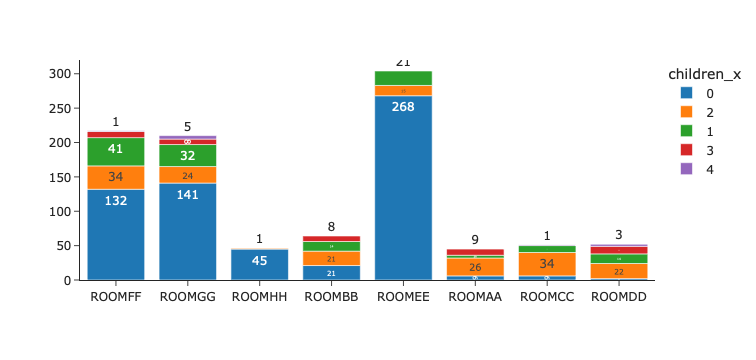

In [39]:
#Visualize the distribution of room types
df = search_room_EUR[(search_room_EUR['conversion'] == 1) & (search_room_EUR['picked_price'] != 0)]
import plotly.express as px
fig = px.histogram(df,
                   x='picked_room',
                   color='children_x',
                   template='simple_white',
                   #barnorm='percent', 
                   text_auto=True,
                   nbins=8)
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

In [40]:
search_room_EUR[(search_room_EUR['conversion'] == 1) & (search_room_EUR['picked_price'] != 0)].tail(5)

id_x  search_log_session_id lang_code currency    arrival  departure  \
23773  146055                  28191        hu      HUF 2025-02-07 2025-02-09   
23784  146067                  28197        hu      HUF 2024-10-20 2024-10-22   
23802  146085                  28200        hu      EUR 2024-10-28 2024-10-31   
23811  146095                  28217        hu      HUF 2025-02-07 2025-02-09   
23828  146108                  28226        hu      HUF 2024-12-18 2024-12-21   

       days  nights  adults_x  children_x  conversion  total_price_final  \
23773     3       2         2           2         1.0           97619.00   
23784     3       2         2           1         1.0          257836.00   
23802     4       3         2           2         1.0            1121.98   
23811     3       2         2           0         1.0           91941.00   
23828     4       3         2           0         1.0          132810.00   

        utc_date  Rate_EUR  total_price_HUF  picked_price picked_room  
23773 2024-10-18    400.05        97619.000      111262.0      ROOMGG  
23784 2024-10-18    400.05       257836.000      241136.0      ROOMDD  
23802 2024-10-18    400.05       448848.099      448848.1      ROOMFF  
23811 2024-10-18    400.05        91941.000       96941.0      ROOMEE  
23828 2024-10-18    400.05       132810.000      137810.0      ROOMEE

In [41]:
#989 - 802 =187 cases when more than 1 room was booked in one booking:
#e.g.: id_x = 144205:
search_room_EUR[search_room_EUR['id_x'] == 144205]

id_x  search_log_session_id lang_code currency    arrival  departure  \
22773  144205                  26701        hu      HUF 2025-01-02 2025-01-04   
22774  144205                  26701        hu      HUF 2025-01-02 2025-01-04   
22775  144205                  26701        hu      HUF 2025-01-02 2025-01-04   
22776  144205                  26701        hu      HUF 2025-01-02 2025-01-04   

       days  nights  adults_x  children_x  conversion  total_price_final  \
22773     3       2         6           3         1.0           582520.0   
22774     3       2         6           3         1.0           582520.0   
22775     3       2         6           3         1.0           582520.0   
22776     3       2         6           3         1.0           582520.0   

        utc_date  Rate_EUR  total_price_HUF  picked_price picked_room  
22773 2024-10-16    400.58         582520.0      134640.0      ROOMFF  
22774 2024-10-16    400.58         582520.0      134640.0      ROOMFF  
22775 2024-10-16    400.58         582520.0      183600.0      ROOMFF  
22776 2024-10-16    400.58         582520.0      134640.0      ROOMFF

In [42]:
183600 + 134640 + 134640 + 134640

587520

In [43]:
search_room_EUR['room_price_night'] = search_room_EUR['picked_price'] / search_room_EUR['nights']

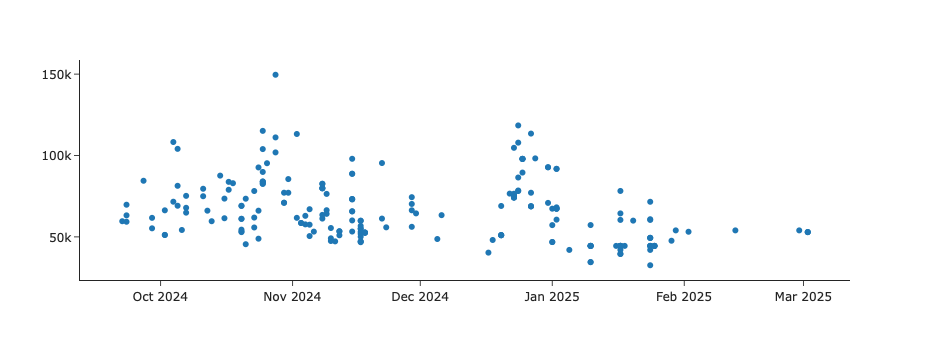

In [44]:
#Visualize the ROOMFF room's price
fig = px.scatter (search_room_EUR[search_room_EUR['picked_room'] == 'ROOMFF'],
              x='arrival',
              y='room_price_night',
              #barmode='group',
              template = 'simple_white')
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

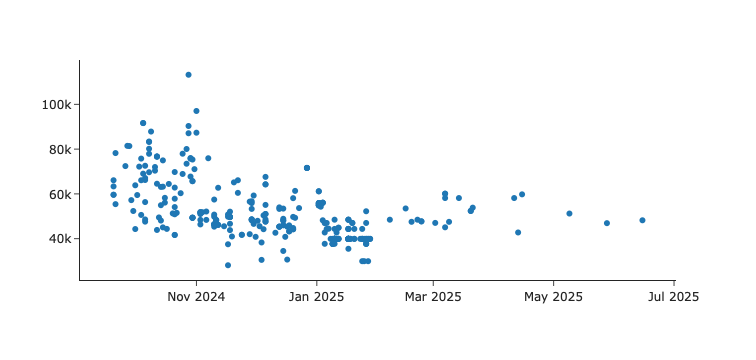

In [45]:
#Visualize the ROOMEE room's price - shows the dynamic price strategy
fig = px.scatter (search_room_EUR[search_room_EUR['picked_room'] == 'ROOMEE'],
              x='arrival',
              y='room_price_night',
              #barmode='group',
              template = 'simple_white')
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

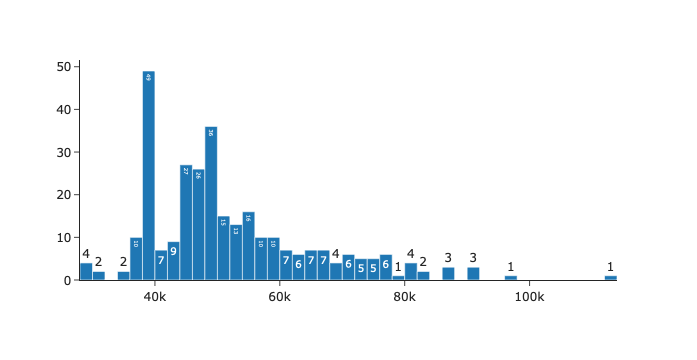

In [46]:
#The histrogram of the price of the ROOMEE
df = search_room_EUR[search_room_EUR['picked_room'] == 'ROOMEE']
fig = px.histogram(df,
                   x='room_price_night',
                   #color='children_x',
                   template='simple_white',
                   #barnorm='percent', 
                   text_auto=True,
                   nbins=70)
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

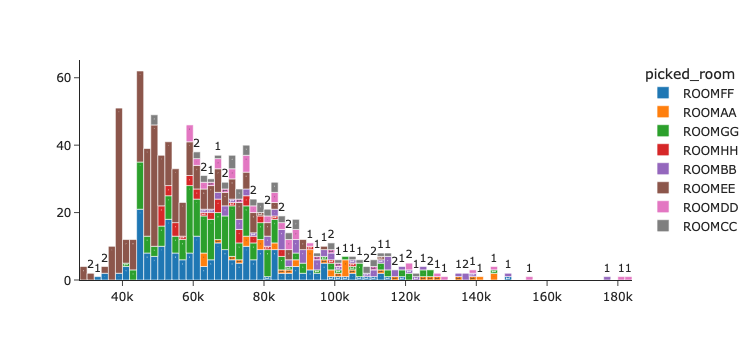

In [47]:
#The histrogram of the prices of the different types of rooms
df = search_room_EUR[search_room_EUR['picked_price'] != 0]
fig = px.histogram(df,
                   x='room_price_night',
                   color='picked_room',
                   template='simple_white',
                   #barnorm='percent', 
                   text_auto=True,
                   nbins=100)
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()


### ROOM_OFFER table - EUR/HUF conversion

In [49]:
room_offer = pd.read_csv('./../Morgens_notebooks/HOTEL_1/Original_data/search_log_room_offer_hotel_1.csv', sep=";")
room_offer.head(10) #109938


id  search_log_id  search_log_room_id room_code  room_price_min  \
0  15527         112645                5794    ROOMEE       248472.00   
1  15528         112645                5794    ROOMFF       272952.00   
2  15529         112645                5794    ROOMGG       280296.00   
3  15536         112648                5797    ROOMFF       190332.00   
4  15537         112648                5797    ROOMGG       195840.00   
5  15538         112648                5797    ROOMCC       227052.00   
6  15628         112680                5829    ROOMEE          465.60   
7  15629         112680                5829    ROOMFF          504.40   
8  15630         112680                5829    ROOMGG          516.04   
9  15634         112682                5831    ROOMAA       619344.00   

   room_price_max  
0       248472.00  
1       272952.00  
2       280296.00  
3       190332.00  
4       195840.00  
5       227052.00  
6          465.60  
7          504.40  
8          516.04  
9       619344.00

In [50]:
search_EUR.head(1) #20980 len 

id  search_log_session_id        utc_datetime lang_code currency  \
0  112759                   4146 2024-09-18 01:27:28        hu      HUF   

     arrival  departure  days  nights  adults  children  conversion  \
0 2024-10-08 2024-10-12     5       4       2         0        -1.0   

   total_price_final   utc_date  Rate_EUR Date_EUR_HUF  total_price_HUF  
0                0.0 2024-09-18    394.47   2024-09-18              0.0

In [51]:
conversion_df = search_EUR[['id', 'currency', 'Rate_EUR', 'Date_EUR_HUF', 'conversion']]

In [52]:
#pd.merge(search, eur_huf, left_on='utc_date', right_on='Date_EUR_HUF')
room_offer_EUR = pd.merge(conversion_df, room_offer, left_on ='id', right_on = 'search_log_id' )
room_offer_EUR = room_offer_EUR.drop(['id_x'], axis=1)
room_offer_EUR.head(1) #len 109913

currency  Rate_EUR Date_EUR_HUF  conversion   id_y  search_log_id  \
0      HUF    394.47   2024-09-18        -1.0  15999         112759   

   search_log_room_id room_code  room_price_min  room_price_max  
0                5908    ROOMGG        324360.0        365460.0

In [53]:
len(room_offer_EUR['search_log_id'].unique()) #18521 search_log_id-hez volt room_offer

18521

In [54]:
#conversion of the room prices columns to HUF
for i in range(len(room_offer_EUR)):
    if room_offer_EUR.iloc[i,0] == 'HUF':
        room_offer_EUR.iloc[i,8] = room_offer_EUR.iloc[i, 8]
        room_offer_EUR.iloc[i,9] = room_offer_EUR.iloc[i, 9]
    elif room_offer_EUR.iloc[i,0] == 'EUR':
        room_offer_EUR.iloc[i, 8] = room_offer_EUR.iloc[i, 1] * room_offer_EUR.iloc[i, 8]
        room_offer_EUR.iloc[i, 9] = room_offer_EUR.iloc[i, 1] * room_offer_EUR.iloc[i, 8]

room_offer_EUR['room_price_min'] = room_offer_EUR['room_price_min'].round(1)
room_offer_EUR['room_price_max'] = room_offer_EUR['room_price_max'].round(1)

In [55]:
room_offer_EUR[room_offer_EUR['conversion'] == 1].head(10)

currency  Rate_EUR Date_EUR_HUF  conversion   id_y  search_log_id  \
503      HUF    394.47   2024-09-18         1.0  16509         112857   
504      HUF    394.47   2024-09-18         1.0  16510         112857   
505      HUF    394.47   2024-09-18         1.0  16511         112857   
506      HUF    394.47   2024-09-18         1.0  16512         112857   
507      HUF    394.47   2024-09-18         1.0  16513         112857   
508      HUF    394.47   2024-09-18         1.0  16514         112857   
509      HUF    394.47   2024-09-18         1.0  16515         112857   
510      HUF    394.47   2024-09-18         1.0  16516         112857   
724      HUF    394.47   2024-09-18         1.0  16734         112906   
725      HUF    394.47   2024-09-18         1.0  16735         112906   

     search_log_room_id room_code  room_price_min  room_price_max  
503                6012    ROOMEE        107712.0        129212.0  
504                6012    ROOMFF        119952.0        141452.0  
505                6012    ROOMGG        123624.0        145124.0  
506                6012    ROOMHH        135252.0        156752.0  
507                6012    ROOMCC        144432.0        165932.0  
508                6012    ROOMDD        156672.0        178172.0  
509                6012    ROOMAA        168912.0        190412.0  
510                6012    ROOMBB        181152.0        202652.0  
724                6063    ROOMCC        340394.0        340394.0  
725                6063    ROOMAA        377114.0        377114.0

## Correlation between budget(meta, google, microsoft), daily users, date pickers and total revenue

#### Budget table

In [58]:
#budget: 31 napra tartalmazza a kampányköltéseket HUF-ban, napi bontás
budget = pd.read_csv('./../Morgens_notebooks/HOTEL_1/Original_data/daily_ppc_budget_hotel_1.csv', sep=",")
budget.rename(columns = {'Unnamed: 0':'date'}, inplace = True)
budget['date'] = pd.to_datetime(budget['date'])

In [59]:
#Summarize the spending in a new column:
budget['total_spending'] = budget['daily_google_spend'] + budget['daily_microsoft_spend'] + budget['daily_meta_spend']

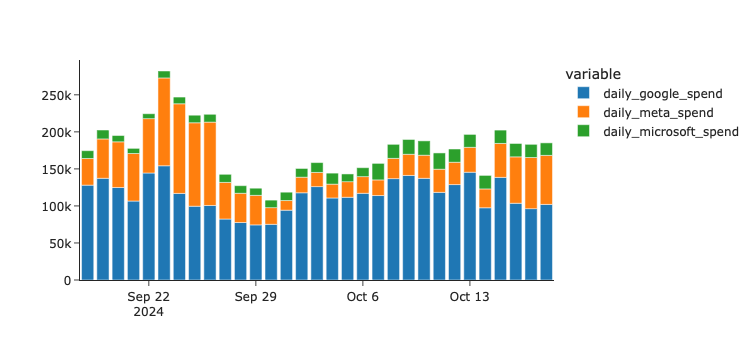

In [60]:
#Visualize the marketing spending by days divided by source
bar = px.bar (budget, 
              x = 'date', 
              y=['daily_google_spend', 'daily_meta_spend', 'daily_microsoft_spend',], 
              template = 'simple_white')

bar.update_layout(xaxis_title=None, yaxis_title=None)

bar.show()

#### Daily users table

In [62]:
#Daily users: felhasználók száma naponta, bontva a forgalom forrásától függően
daily_users = pd.read_csv('./../Morgens_notebooks/HOTEL_1/Original_data/website_daily_users_hotel_1.csv', sep=";")
daily_users['date'] = pd.to_datetime(daily_users['date'])
daily_users.rename(columns={'user_count':'daily_user','session_count':'daily_session'}, inplace=True)

In [63]:
#Aggregate the table by days
daily_agg = daily_users[['date', 'daily_user', 'daily_session']].groupby('date').sum()
#date index row to be first column
daily_agg.reset_index(inplace=True)
daily_agg.head(1)

date  daily_user  daily_session
0 2024-09-18        1991           2368

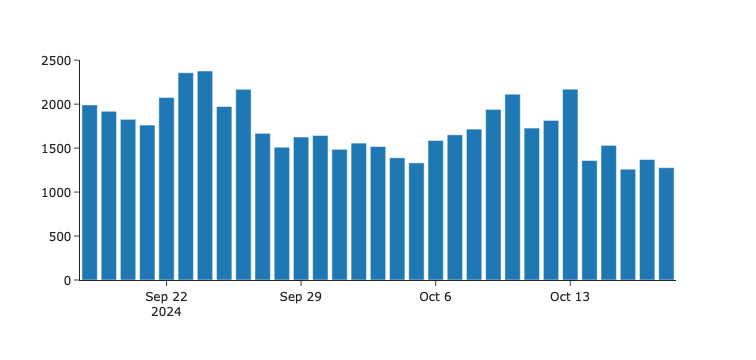

In [64]:
#Visualize
bar = px.bar (daily_agg, x = 'date', y='daily_user',  template = 'simple_white', barmode='group')

bar.update_layout(xaxis_title=None, yaxis_title=None)

bar.show()


#### Datepickers table

In [66]:
datepickers = pd.read_csv('./../Morgens_notebooks/HOTEL_1/Original_data/datepicker_daily_visitors_hotel_1.csv', sep=";")
datepickers['date'] = pd.to_datetime(datepickers['date']) #Change the datatype
datepickers.rename(columns={'user_count':'date_pickers_user','session_count':'date_pickers_session'}, inplace=True) #Change the column name
datepickers.head(2)

date utm_source_and_medium utm_campaign  date_pickers_user  \
0 2024-09-18     (direct) / (none)     (direct)                104   
1 2024-09-18          google / cpc    (not set)                 59   

   date_pickers_session  
0                   124  
1                    59

In [67]:
#Aggregate the table by day
date_pickers_agg = datepickers[['date', 'date_pickers_user', 'date_pickers_session']].groupby('date').sum() 
#date index row to be first column
date_pickers_agg.reset_index(inplace=True)
date_pickers_agg.head(2)

date  date_pickers_user  date_pickers_session
0 2024-09-18                393                   436
1 2024-09-19                337                   379

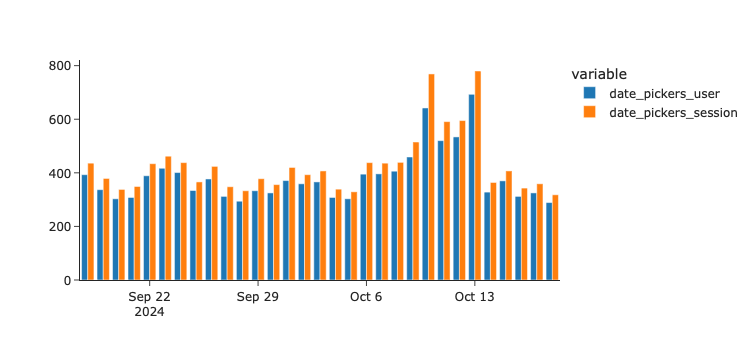

In [68]:
#Visualize

bar = px.bar (date_pickers_agg, x = 'date', y=['date_pickers_user', 'date_pickers_session'],  template = 'simple_white', barmode='group')

bar.update_layout(xaxis_title=None, yaxis_title=None)

bar.show()

#### Total revenue table
== search_EUR_agg

In [70]:
#date index row to be first column
search_EUR_agg.reset_index(inplace=True)
search_EUR_agg.head(2)

utc_date       id  search_log_session_id  days  nights  adults  children  \
0 2024-09-18  1697787                  65738    60      45      32        10   
1 2024-09-19  3197162                 144110   101      73      67        17   

   conversion  total_price_final  Rate_EUR  total_price_HUF  
0        15.0         2336824.84   5917.05     3.089863e+06  
1        28.0         5161221.87  11051.60     6.599491e+06

In [71]:
search_EUR_agg = search_EUR_agg[['utc_date', 'total_price_HUF', 'days', 'adults', 'children']]
search_EUR_agg.head(2)

utc_date  total_price_HUF  days  adults  children
0 2024-09-18     3.089863e+06    60      32        10
1 2024-09-19     6.599491e+06   101      67        17

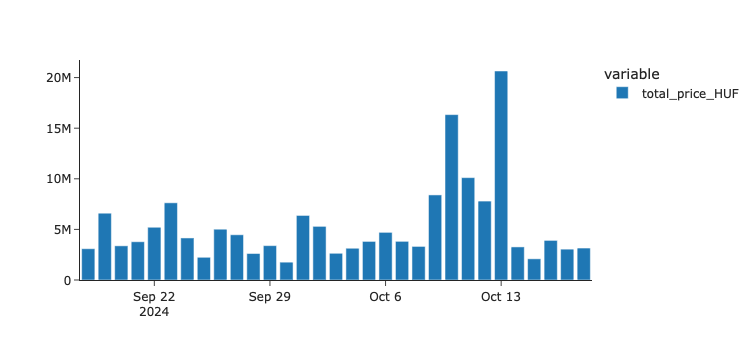

In [72]:
#Visualize

bar = px.bar (search_EUR_agg, x = 'utc_date', y=['total_price_HUF'],  template = 'simple_white')

bar.update_layout(xaxis_title=None, yaxis_title=None)

bar.show()

#### Correlation table

In [74]:
#concat
correlation_df = pd.concat([budget, daily_agg, date_pickers_agg, search_EUR_agg], axis=1)

In [75]:
correlation_df.head(1)

date  daily_google_spend  daily_microsoft_spend  daily_meta_spend  \
0 2024-09-18              128044                  10564             35950   

   total_spending       date  daily_user  daily_session       date  \
0          174558 2024-09-18        1991           2368 2024-09-18   

   date_pickers_user  date_pickers_session   utc_date  total_price_HUF  days  \
0                393                   436 2024-09-18     3.089863e+06    60   

   adults  children  
0      32        10

In [76]:
correlation_df = correlation_df[['total_spending', 'daily_user', 'date_pickers_user', 'total_price_HUF', 'days']]

In [77]:
correlation_df.corr()

total_spending  daily_user  date_pickers_user  \
total_spending           1.000000    0.704966           0.256037   
daily_user               0.704966    1.000000           0.536425   
date_pickers_user        0.256037    0.536425           1.000000   
total_price_HUF          0.219483    0.469733           0.904922   
days                     0.178611    0.443804           0.915324   

                   total_price_HUF      days  
total_spending            0.219483  0.178611  
daily_user                0.469733  0.443804  
date_pickers_user         0.904922  0.915324  
total_price_HUF           1.000000  0.989446  
days                      0.989446  1.000000

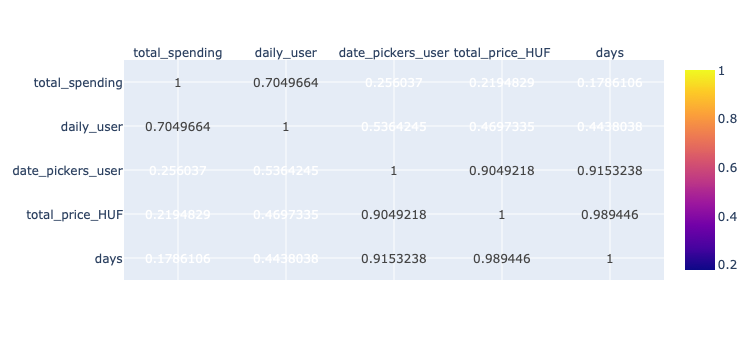

In [78]:
#Visualize it in a heatmap
#Total marketing spending - total users - total revenue 
fig = px.imshow(correlation_df.corr(), text_auto=True, aspect="auto")
fig.update_xaxes(side="top")
fig.show()

In [79]:
#CORRELATION 2: WITHOUT THE UNPAID USERS / UNPAID DATE-PICKERS / UNPAID REVENUE
#load 4 tables from the Hotel_1_Conversion:

In [80]:
#1: Budget
#budget: marketing spending in EUR by days
budget = pd.read_csv('./../Morgens_notebooks/HOTEL_1/Original_data/daily_ppc_budget_hotel_1.csv', sep=",")
budget.rename(columns = {'Unnamed: 0':'date'}, inplace = True)
budget['date'] = pd.to_datetime(budget['date'])
#Summarize the spending in a new column:
budget['total_spending'] = budget['daily_google_spend'] + budget['daily_microsoft_spend'] + budget['daily_meta_spend']
budget.head(1)

date  daily_google_spend  daily_microsoft_spend  daily_meta_spend  \
0 2024-09-18              128044                  10564             35950   

   total_spending  
0          174558

In [81]:
#2: Daily users

user = pd.read_csv('./../Morgens_notebooks/HOTEL_1/Clean_data/pivot_dailyusers.csv', index_col=[0])

user['Paid'] = user['Google'] + user['META'] + user['Microsoft']
user.columns = ['date', 'user_Google', 'user_META', 'user_Microsoft','user_Unpaid', 'user_Paid']

user.head(1)

date  user_Google  user_META  user_Microsoft  user_Unpaid  user_Paid
0  2024-09-18          718        165              21         1087        904

In [82]:
#3: Datepickers

picker = pd.read_csv('./../Morgens_notebooks/HOTEL_1/Clean_data/pivot_datepickers.csv', index_col=[0])

picker['Paid'] = picker['Google'] + picker['META'] + picker['Microsoft']
picker.columns = ['date', 'picker_Google', 'picker_META', 'picker_Microsoft','picker_Unpaid', 'picker_Paid']

picker.head(1)

date  picker_Google  picker_META  picker_Microsoft  picker_Unpaid  \
0  2024-09-18            175           27                 5            186   

   picker_Paid  
0          207

In [83]:
#4: Revenue

revenue = pd.read_csv('./../Morgens_notebooks/HOTEL_1/Clean_data/pivot_booking_sum.csv', index_col=0)

revenue['Paid'] = revenue['Google'] + revenue['META'] + revenue['Microsoft']
revenue.columns = ['date', 'revenue_0', 'revenue_Google', 'revenue_META', 'revenue_Microsoft','revenue_Unpaid', 'revenue_Paid']

revenue.head(1)

date  revenue_0  revenue_Google  revenue_META  revenue_Microsoft  \
0  2024-09-18   921545.0       1579467.0           0.0                0.0   

   revenue_Unpaid  revenue_Paid  
0        588851.5     1579467.0

In [84]:
#5: Number of bookings

booking_number = pd.read_csv('./../Morgens_notebooks/HOTEL_1/Clean_data/pivot_booking_count.csv', index_col=0)

booking_number['Paid'] = booking_number['Google'] + booking_number['META'] + booking_number['Microsoft']
booking_number.columns = ['date', 'count_0', 'count_Google', 'count_META', 'count_Microsoft','count_Unpaid', 'count_Paid']

booking_number.head(1)

date  count_0  count_Google  count_META  count_Microsoft  \
0  2024-09-18        4             8           0                0   

   count_Unpaid  count_Paid  
0             3           8

In [85]:
correlation_all = pd.concat([budget, user, picker, revenue, booking_number], axis=1)


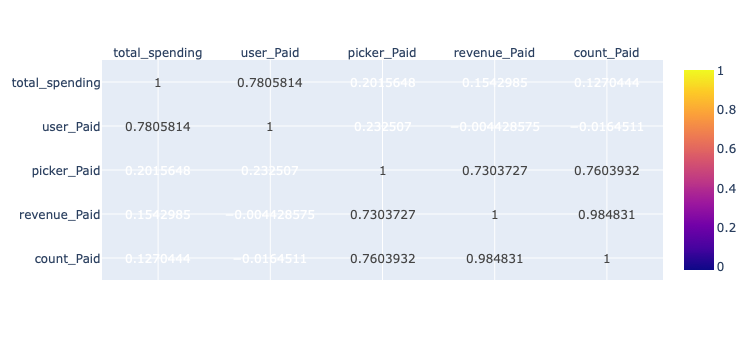

In [86]:
correlation_1 = correlation_all[['total_spending','user_Paid','picker_Paid','revenue_Paid', 'count_Paid']]
correlation_1.corr()
fig = px.imshow(correlation_1.corr(), text_auto=True, aspect="auto")
fig.update_xaxes(side="top")
fig.show()

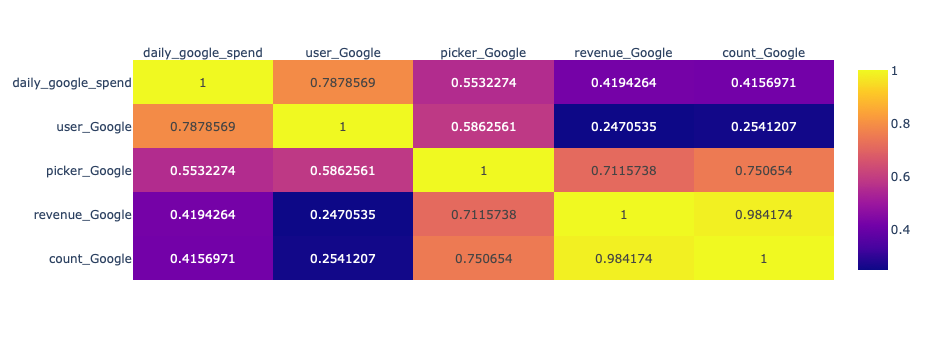

In [87]:
correlation_google = correlation_all[['daily_google_spend',
                                'user_Google',
                                'picker_Google',
                                'revenue_Google',
                                'count_Google']]
correlation_google.corr()
fig = px.imshow(correlation_google.corr(), text_auto=True, aspect="auto")
fig.update_xaxes(side="top")
fig.show()

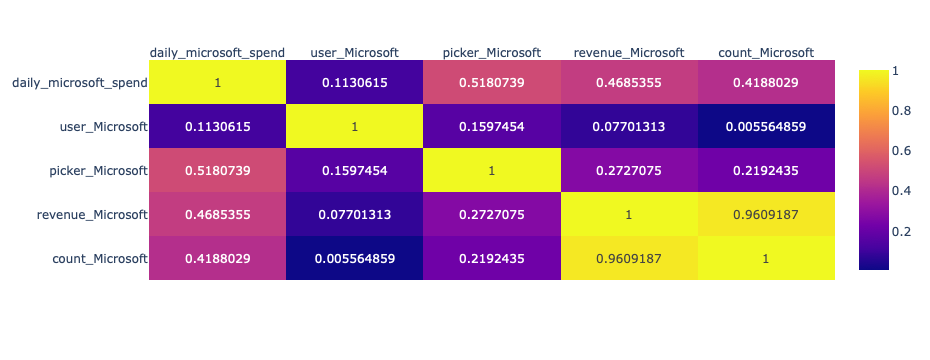

In [88]:
correlation_microsoft = correlation_all[['daily_microsoft_spend',
                                'user_Microsoft',
                                'picker_Microsoft',
                                'revenue_Microsoft',
                                'count_Microsoft']]
correlation_microsoft.corr()
fig = px.imshow(correlation_microsoft.corr(), text_auto=True, aspect="auto")
fig.update_xaxes(side="top")
fig.show()

In [89]:
correlation_all.columns

Index(['date', 'daily_google_spend', 'daily_microsoft_spend',
       'daily_meta_spend', 'total_spending', 'date', 'user_Google',
       'user_META', 'user_Microsoft', 'user_Unpaid', 'user_Paid', 'date',
       'picker_Google', 'picker_META', 'picker_Microsoft', 'picker_Unpaid',
       'picker_Paid', 'date', 'revenue_0', 'revenue_Google', 'revenue_META',
       'revenue_Microsoft', 'revenue_Unpaid', 'revenue_Paid', 'date',
       'count_0', 'count_Google', 'count_META', 'count_Microsoft',
       'count_Unpaid', 'count_Paid'],
      dtype='object')

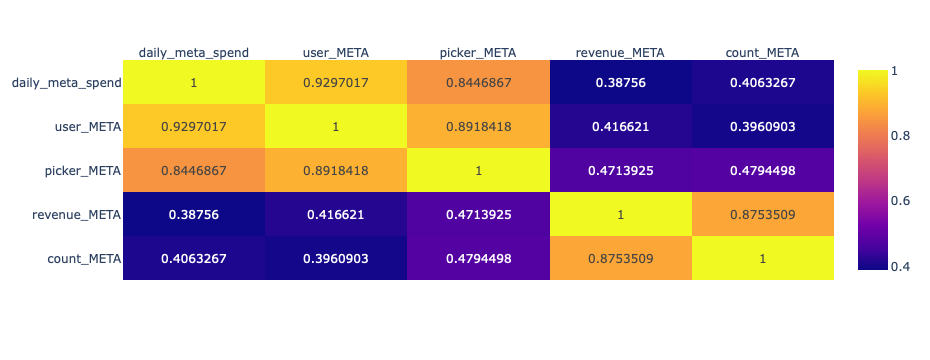

In [90]:
correlation_META = correlation_all[['daily_meta_spend',
                                'user_META',
                                'picker_META',
                                'revenue_META',
                                'count_META']]
correlation_META.corr()
fig = px.imshow(correlation_META.corr(), text_auto=True, aspect="auto")
fig.update_xaxes(side="top")
fig.show()

## LEAD TIME ANALYSIS (period between the date of search or booking and the date of arrival)

In [92]:
#new column: lead time - number of days between search/booking and arrival
search_EUR['lead_time'] = search_EUR['arrival'] - search_EUR['utc_date']

In [93]:
search_EUR.head()

id  search_log_session_id        utc_datetime lang_code currency  \
0  112759                   4146 2024-09-18 01:27:28        hu      HUF   
1  112760                   4147 2024-09-18 01:53:05        hu      HUF   
2  112761                   4147 2024-09-18 01:59:34        hu      HUF   
3  112762                   4148 2024-09-18 02:10:58        hu      HUF   
4  112764                   4150 2024-09-18 03:46:37        de      EUR   

     arrival  departure  days  nights  adults  children  conversion  \
0 2024-10-08 2024-10-12     5       4       2         0        -1.0   
1 2024-09-18 2024-09-19     2       1       2         0        -1.0   
2 2024-10-05 2024-10-06     2       1       2         0        -1.0   
3 2024-10-18 2024-10-20     3       2       2         0        -1.0   
4 2024-10-13 2024-10-17     5       4       2         0        -1.0   

   total_price_final   utc_date  Rate_EUR Date_EUR_HUF  total_price_HUF  \
0                0.0 2024-09-18    394.47   2024-09-18              0.0   
1                0.0 2024-09-18    394.47   2024-09-18              0.0   
2                0.0 2024-09-18    394.47   2024-09-18              0.0   
3                0.0 2024-09-18    394.47   2024-09-18              0.0   
4                0.0 2024-09-18    394.47   2024-09-18              0.0   

  lead_time  
0   20 days  
1    0 days  
2   17 days  
3   30 days  
4   25 days

In [94]:
#Realized serch == booking's lead time
realized = search_EUR[search_EUR['total_price_final'] != 0]
realized['lead_time'].describe()

count                           802
mean     55 days 03:03:08.528678304
std      41 days 02:21:43.286050533
min                 0 days 00:00:00
25%                21 days 00:00:00
50%                47 days 00:00:00
75%                89 days 00:00:00
max               269 days 00:00:00
Name: lead_time, dtype: object

In [95]:
#The not realized/not booked searches' lead time
not_realized = search_EUR[search_EUR['total_price_final'] == 0]
not_realized['lead_time'].describe()

count                         20178
mean     49 days 01:29:33.773416592
std      46 days 05:48:12.435780206
min               -2 days +00:00:00
25%                16 days 00:00:00
50%                35 days 00:00:00
75%                78 days 00:00:00
max               413 days 00:00:00
Name: lead_time, dtype: object

In [96]:
#show me the -2 days, it is hightime for time travelling!
search_EUR['lead_time_numbers'] = pd.to_numeric(search_EUR['lead_time'], errors='coerce') #change the datatype to numeric
search_EUR[search_EUR['lead_time_numbers'] < 0] #now you can compare numbers to numbers

id  search_log_session_id        utc_datetime lang_code currency  \
1254  114792                   5652 2024-09-20 00:52:22        hu      HUF   
1255  114793                   5652 2024-09-20 00:52:27        hu      HUF   
1257  114795                   5652 2024-09-20 00:53:25        hu      HUF   
1258  114796                   5652 2024-09-20 00:53:32        hu      HUF   

        arrival  departure  days  nights  adults  children  conversion  \
1254 2024-09-18 2024-09-20     3       2       2         0        -1.0   
1255 2024-09-18 2024-09-20     3       2       2         0        -1.0   
1257 2024-09-19 2024-09-21     3       2       2         0        -1.0   
1258 2024-09-19 2024-09-21     3       2       2         0        -1.0   

      total_price_final   utc_date  Rate_EUR Date_EUR_HUF  total_price_HUF  \
1254                0.0 2024-09-20    394.39   2024-09-20              0.0   
1255                0.0 2024-09-20    394.39   2024-09-20              0.0   
1257                0.0 2024-09-20    394.39   2024-09-20              0.0   
1258                0.0 2024-09-20    394.39   2024-09-20              0.0   

     lead_time  lead_time_numbers  
1254   -2 days   -172800000000000  
1255   -2 days   -172800000000000  
1257   -1 days    -86400000000000  
1258   -1 days    -86400000000000

In [97]:
#Convert the lead_time from days to numerical numbers into a separate column
search_EUR['lead_time_days'] = search_EUR['lead_time'].dt.days

In [98]:
search_EUR.head(3)

id  search_log_session_id        utc_datetime lang_code currency  \
0  112759                   4146 2024-09-18 01:27:28        hu      HUF   
1  112760                   4147 2024-09-18 01:53:05        hu      HUF   
2  112761                   4147 2024-09-18 01:59:34        hu      HUF   

     arrival  departure  days  nights  adults  children  conversion  \
0 2024-10-08 2024-10-12     5       4       2         0        -1.0   
1 2024-09-18 2024-09-19     2       1       2         0        -1.0   
2 2024-10-05 2024-10-06     2       1       2         0        -1.0   

   total_price_final   utc_date  Rate_EUR Date_EUR_HUF  total_price_HUF  \
0                0.0 2024-09-18    394.47   2024-09-18              0.0   
1                0.0 2024-09-18    394.47   2024-09-18              0.0   
2                0.0 2024-09-18    394.47   2024-09-18              0.0   

  lead_time  lead_time_numbers  lead_time_days  
0   20 days   1728000000000000              20  
1    0 days                  0               0  
2   17 days   1468800000000000              17

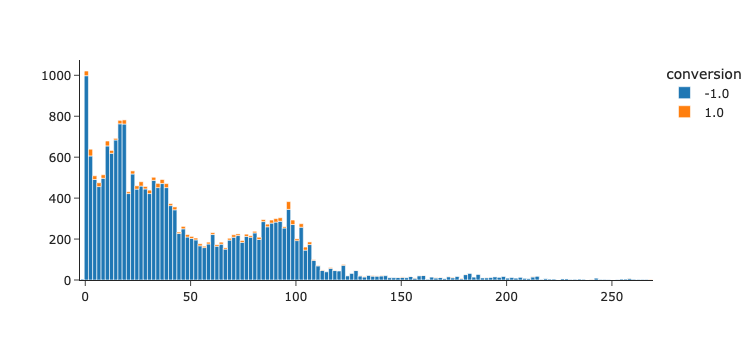

In [99]:
#Visualize the distribution of lead times: histogram in plotly
import plotly.express as px
df = search_EUR[search_EUR['lead_time_days'] < 270]
fig = px.histogram(df, x='lead_time_days', color='conversion', nbins=200, template = 'simple_white')
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

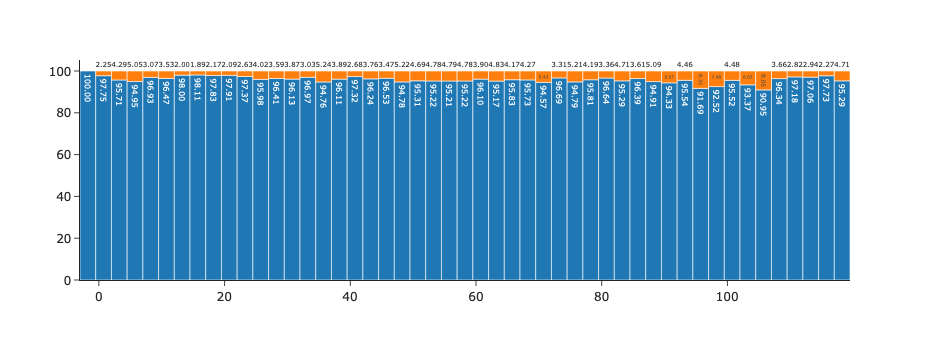

In [237]:
#SHows those lines where the lead time days are less than 120 days
df = search_EUR[search_EUR['lead_time_days'] < 120]
fig = px.histogram(df, x="lead_time_days", 
                   color="conversion", 
                   nbins=100,
                   barnorm='percent', 
                   template = 'simple_white', 
                   text_auto='.2f')

#remove the labels of x and y axes
fig.update_layout(xaxis_title=None, yaxis_title=None)

#ez a feliratot
fig.update_traces(showlegend=False, xbins_size=2.5, textfont=dict(size=8))

fig.show()

In [101]:
#Calculate the ratio of the 2 peaks: lead time = 2 days / lead time = 96 days
data = search_EUR[search_EUR['total_price_final'] != 0]
len(data[data['lead_time_days'] == 2]) #21
len(data[data['lead_time_days'] == 3]) #12
len(data[data['lead_time_days'] == 96]) #27
len(data[data['lead_time_days'] == 97]) #11
33/802

0.04114713216957606

In [102]:
data[data['lead_time_days'] == 96] 

id  search_log_session_id        utc_datetime lang_code currency  \
2398   116400                   6787 2024-09-22 08:44:18        hu      HUF   
4043   119202                   8940 2024-09-24 16:17:30        hu      HUF   
4574   120118                   9616 2024-09-25 12:56:42        hu      HUF   
6660   124226                  12850 2024-09-29 11:37:22        hu      HUF   
6680   124246                  12867 2024-09-29 12:04:50        hu      HUF   
6687   124253                  12850 2024-09-29 12:07:04        hu      HUF   
6954   124528                  13005 2024-09-29 18:51:44        hu      HUF   
15971  138622                  23077 2024-10-12 10:05:19        hu      HUF   
15972  138623                  23064 2024-10-12 10:05:30        hu      HUF   
16845  139864                  23910 2024-10-13 07:18:37        hu      HUF   
17054  140078                  24014 2024-10-13 10:19:15        hu      HUF   
17226  140260                  24113 2024-10-13 12:48:19        hu      HUF   
17249  140283                  24127 2024-10-13 13:01:53        hu      HUF   
17639  140685                  24305 2024-10-13 16:30:41        hu      HUF   
17716  140780                  24358 2024-10-13 17:06:56        hu      HUF   
17818  140884                  24414 2024-10-13 17:46:35        hu      HUF   
17848  140914                  24427 2024-10-13 18:01:44        hu      HUF   
17984  141053                  24482 2024-10-13 18:59:57        hu      HUF   
17998  141067                  24507 2024-10-13 19:19:40        hu      HUF   
18022  141093                  24478 2024-10-13 19:26:16        hu      HUF   
18033  141104                  24515 2024-10-13 19:28:08        hu      HUF   
18054  141128                  24536 2024-10-13 19:37:34        hu      HUF   
18075  141151                  24523 2024-10-13 19:44:54        hu      HUF   
18114  141193                  24566 2024-10-13 20:05:09        hu      HUF   
18149  141488                  24841 2024-10-13 20:29:44        hu      HUF   
18152  141491                  24803 2024-10-13 20:31:44        hu      HUF   
18248  141589                  24890 2024-10-13 21:51:03        hu      HUF   

         arrival  departure  days  nights  adults  children  conversion  \
2398  2024-12-27 2024-12-30     4       3       3         1         1.0   
4043  2024-12-29 2025-01-02     5       4       2         0         1.0   
4574  2024-12-30 2025-01-02     4       3       2         0         1.0   
6660  2025-01-03 2025-01-06     4       3       2         2         1.0   
6680  2025-01-03 2025-01-06     4       3       2         0         1.0   
6687  2025-01-03 2025-01-06     4       3       2         2         1.0   
6954  2025-01-03 2025-01-06     4       3       2         3         1.0   
15971 2025-01-16 2025-01-19     4       3       2         2         1.0   
15972 2025-01-16 2025-01-19     4       3       2         1         1.0   
16845 2025-01-17 2025-01-19     3       2       2         0         1.0   
17054 2025-01-17 2025-01-19     3       2       2         0         1.0   
17226 2025-01-17 2025-01-22     6       5       2         0         1.0   
17249 2025-01-17 2025-01-19     3       2       2         0         1.0   
17639 2025-01-17 2025-01-19     3       2       2         1         1.0   
17716 2025-01-17 2025-01-19     3       2       2         0         1.0   
17818 2025-01-17 2025-01-20     4       3       2         0         1.0   
17848 2025-01-17 2025-01-19     3       2       2         0         1.0   
17984 2025-01-17 2025-01-20     4       3       2         2         1.0   
17998 2025-01-17 2025-01-19     3       2       2         2         1.0   
18022 2025-01-17 2025-01-19     3       2       6         4         1.0   
18033 2025-01-17 2025-01-19     3       2       2         0         1.0   
18054 2025-01-17 2025-01-19     3       2       3         0         1.0   
18075 2025-01-17 2025-01-19     3       2       2         0         1.0  

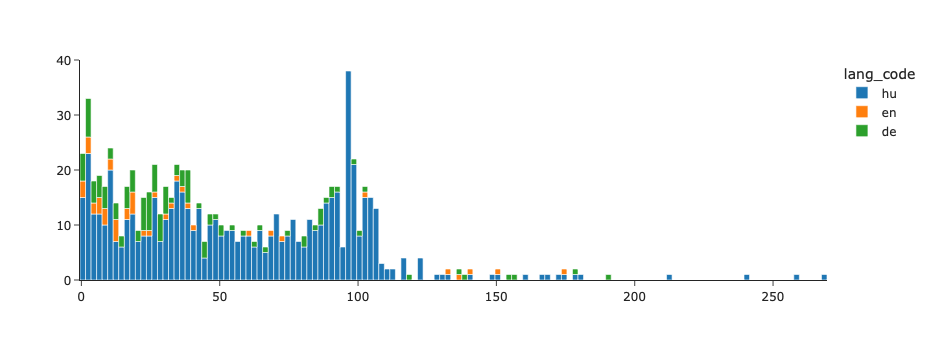

In [103]:
#BOOKINGS
#Visualize the distribution of lead times of the realized bookings: histogram in plotly
import plotly.express as px
df = search_EUR[(search_EUR['total_price_final'] != 0) & (search_EUR['lang_code'] == 'hu')]
fig = px.histogram(search_EUR[search_EUR['total_price_final'] != 0], color='lang_code',
                   x='lead_time_days',
                   nbins=150,
                   template = 'simple_white')
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()


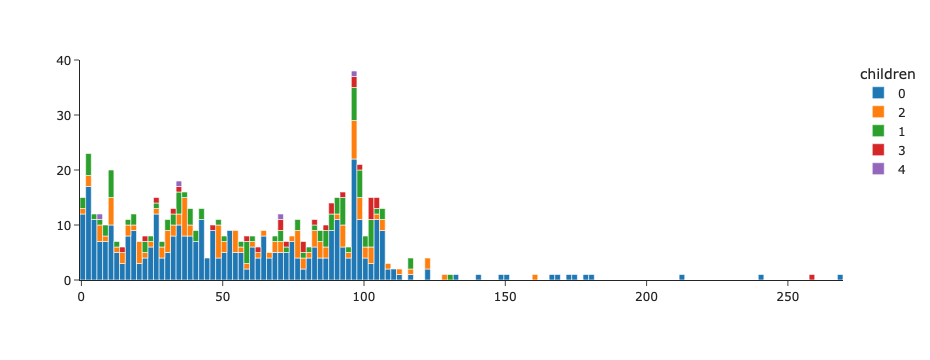

In [104]:
#HUNGARIAN BOOKINGS
#Visualize the distribution of lead times where the realized bookings are  Hungarian
import plotly.express as px
df = search_EUR[(search_EUR['total_price_final'] != 0) & (search_EUR['lang_code'] == 'hu') ]
#df = search_EUR[search_EUR['total_price_final'] != 0]
fig = px.histogram(df, x='lead_time_days', nbins=200, color = 'children',template = 'simple_white')
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

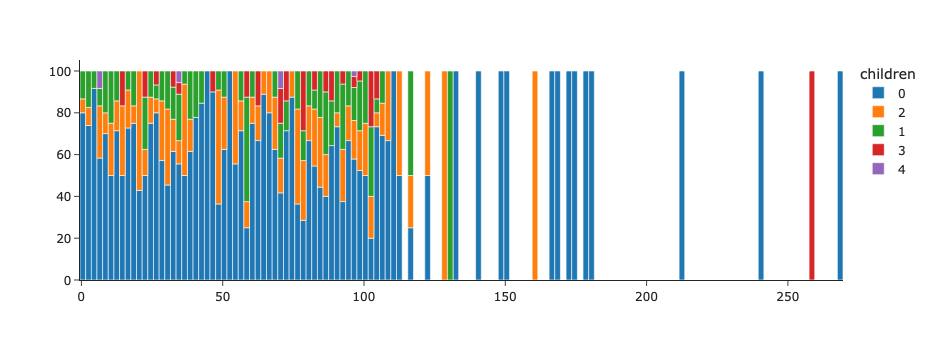

In [105]:
#HUNGARIAN BOOKINGS
#Visualize the distribution of lead times where the realized bookings are  Hungarian
import plotly.express as px
df = search_EUR[(search_EUR['total_price_final'] != 0) & (search_EUR['lang_code'] == 'hu') ]
fig = px.histogram(df, x='lead_time_days', barnorm='percent', nbins=200, color = 'children',template = 'simple_white')
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

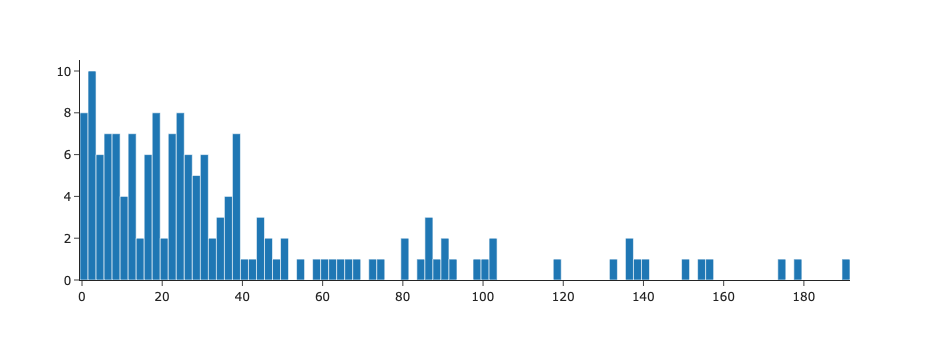

In [106]:
#Visualize the distribution of lead times where the realized bookings are NOT Hungarian
import plotly.express as px
df = search_EUR[(search_EUR['total_price_final'] != 0) & ((search_EUR['lang_code'] == 'de') | (search_EUR['lang_code'] == 'en'))]
#df = search_EUR[search_EUR['total_price_final'] != 0]
fig = px.histogram(df, x='lead_time_days', nbins=100, template = 'simple_white')
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

In [107]:
#These are the searches where bookings were made, aggregated by the days
search_EUR_agg = search_EUR[search_EUR['total_price_final'] != 0].groupby('utc_date').sum()
search_EUR_agg = search_EUR_agg[['days', 'nights', 'adults', 'children', 'conversion', 'total_price_HUF', 'lead_time_days']]
search_EUR_agg

/var/folders/_3/r7b6vqh57xg62bszfyf8bwhc0000gn/T/ipykernel_1121/998629949.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



days  nights  adults  children  conversion  total_price_HUF  \
utc_date                                                                  
2024-09-18    60      45      32        10        15.0     3.089863e+06   
2024-09-19   101      73      67        17        28.0     6.599491e+06   
2024-09-20    52      37      40         4        15.0     3.375079e+06   
2024-09-21    59      42      40        11        17.0     3.778961e+06   
2024-09-22    91      65      53        14        26.0     5.211128e+06   
2024-09-23   115      83      82        21        32.0     7.626516e+06   
2024-09-24    70      53      40         9        17.0     4.152750e+06   
2024-09-25    46      35      20         5        11.0     2.244256e+06   
2024-09-26    78      57      47        16        21.0     5.018181e+06   
2024-09-27    63      46      46        12        17.0     4.468367e+06   
2024-09-28    45      34      25         7        11.0     2.616519e+06   
2024-09-29    63      46      35        19        17.0     3.393737e+06   
2024-09-30    30      21      20         7         9.0     1.762015e+06   
2024-10-01   119      87      70        28        32.0     6.377538e+06   
2024-10-02    87      65      49         4        22.0     5.300424e+06   
2024-10-03    53      40      30         6        13.0     2.639479e+06   
2024-10-04    40      28      31         9        12.0     3.137299e+06   
2024-10-05    76      53      46        16        23.0     3.811789e+06   
2024-10-06    70      54      47         8        16.0     4.707122e+06   
2024-10-07    65      46      45         8        19.0     3.818937e+06   
2024-10-08    62      45      41         7        17.0     3.318205e+06   
2024-10-09   116      84      92        19        32.0     8.405725e+06   
2024-10-10   322     228     227        58        94.0     1.633990e+07   
2024-10-11   190     135     162        16        55.0     1.011253e+07   
2024-10-12   146     104      98        41        42.0     7.797669e+06   
2024-10-13   406     286     325        70       120.0     2.065038e+07   
2024-10-14    50      35      37         5        15.0     3.268347e+06   
2024-10-15    35      25      25         2        10.0     2.091753e+06   
2024-10-16    54      38      38        10        16.0     3.912728e+06   
2024-10-17    51      37      30        12        14.0     3.047184e+06   
2024-10-18    53      39      29         9        14.0     3.156456e+06   

            lead_time_days  
utc_date                    
2024-09-18             801  
2024-09-19            1379  
2024-09-20             348  
2024-09-21            1201  
2024-09-22            1507  
2024-09-23            1303  
2024-09-24             879  
2024-09-25             616  
2024-09-26            1183  
2024-09-27             791  
2024-09-28             249  
2024-09-29            1131  
2024-09-30             558  
2024-10-01            1491  
2024-10-02             746  
2024-10-03             651  
2024-10-04             401  
2024-10-05            1402  
2024-10-06             918  
2024-10-07             906  
2024-10-08             916  
2024-10-09            1607  
2024-10-10            5774  
2024-10-11            3411  
2024-10-12            2689  
2024-10-13            8451  
2024-10-14             894  
2024-10-15             361  
2024-10-16             304  
2024-10-17             409  
2024-10-18             935

In [108]:
#Save it again with the lead time columns
search_EUR.to_csv('./../Morgens_notebooks/HOTEL_1/Original_data/search_EUR.csv')

### Analysis of loyalty discounts

In [110]:
len(booking_search[booking_search['vouchers_total_price'] != 0]) #2 db
len(booking_search[booking_search['loyalty_discount_total'] != 0]) #674 db !!sok törzsvásárló
len(booking_search[booking_search['upsell_total_price'] != 0]) #54 db

54

In [111]:
#676/802*100=84,289 #84 % of the bookings were made with discounts/vouchers

In [112]:
#Percentage of the loyalty discount without children / with children
len(booking_search[(booking_search['loyalty_discount_total']!= 0) & (booking_search['children'] ==0)]) #440 without 66%
len(booking_search[(booking_search['loyalty_discount_total']!= 0) & (booking_search['children'] !=0)]) #234 with 34%
234/(674)

0.34718100890207715

In [113]:
#The loyalty discounts in value: the distribution of the loyalty_discount_total
booking_search[booking_search['loyalty_discount_total']!= 0]['loyalty_discount_total'] .describe()

count       674.000000
mean      25920.611276
std       16856.981524
min        4435.200000
25%       14705.300000
50%       20946.150000
75%       32436.000000
max      135749.300000
Name: loyalty_discount_total, dtype: float64

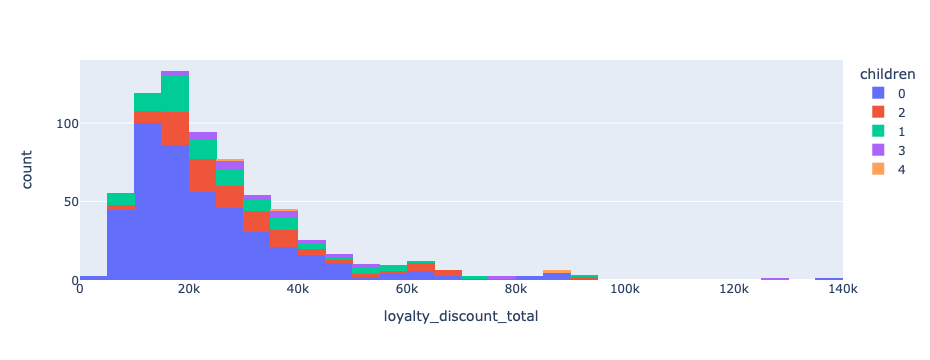

In [114]:
#Visualize the histogram of the distribution of the loyalty_discount_total
df = booking_search[booking_search['loyalty_discount_total']!= 0]
fig = px.histogram(df, x='loyalty_discount_total', color='children')
fig.show()
#bontva hu/en/de szerint: főleg a magyarok veszik igénybe
#bontva a gyerekek száma szerint: ábrázold külön a gyerekeseket, a görbéjük nagyobb kedvezménynél maximális
#bontva a tartózkodási idő hossza szerint: a %-os kedvezmény miatt a rövidebb ideig tartózkodók kevesebb kedvezményt vesznek igénybe

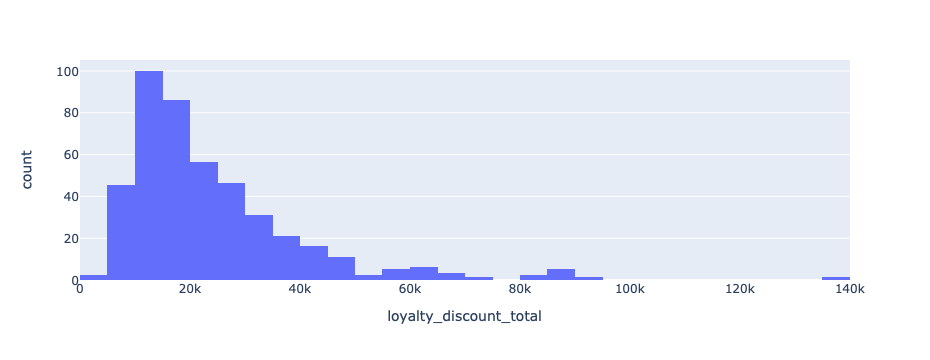

In [115]:
#Without children: the distribution of the loyalty_discount
df = booking_search[(booking_search['loyalty_discount_total']!= 0) & (booking_search['children'] ==0)]
fig = px.histogram(df, x='loyalty_discount_total')
fig.show()

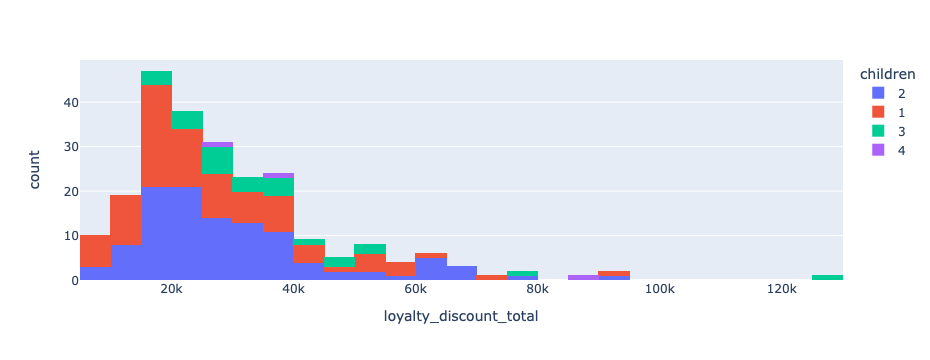

In [116]:
#With children: the distribution of the loyalty_discount: higher values
df = booking_search[(booking_search['loyalty_discount_total']!= 0) & (booking_search['children'] != 0)]
fig = px.histogram(df, x='loyalty_discount_total', color='children')
fig.show()